In [1]:
import queueing_process as qp
import matplotlib.pyplot as plt
import numpy as np

# Placeholder delay distributions

In [2]:
def symptom_onset_to_joining_queue():
    return 2

In [3]:
def test_processing_delay_dist():
    return 1

# Model set up

In [4]:
days_to_simulate = 150
demand = [int(round(100*np.exp(0.05 * time))) for time in range(days_to_simulate)] 
capacity = [500 + time * 10 for time in range(days_to_simulate)]

In [5]:
my_queue = qp.queueing_process(
    days_to_simulate = days_to_simulate,
    capacity = capacity,
    demand = demand,
    symptom_onset_to_joining_queue_dist = symptom_onset_to_joining_queue,
    test_processing_delay_dist = test_processing_delay_dist
)

In [6]:
%%time
my_queue.run_simulation()

In [7]:
my_queue.queue_info

,time,new_applicants,capacity,spillover_to_next_day,total_applications_today,capacity_exceeded,capacity_exceeded_by,number_swabbed_today,number_left_queue_not_tested
0,0,100,500,0,100,False,0,100,0
1,1,105,510,0,105,False,0,105,0
2,2,111,520,0,111,False,0,111,0
3,3,116,530,0,116,False,0,116,0
4,4,122,540,0,122,False,0,122,0
...,...,...,...,...,...,...,...,...,...
145,145,140810,1950,601475,634590,True,632640,1950,107695
146,146,148030,1960,632640,667299,True,665339,1960,113371
147,147,155620,1970,665339,701737,True,699767,1970,119222
148,148,163598,1980,699767,737885,True,735905,1980,125480


Text(0.5, 0, 'Time (days)')

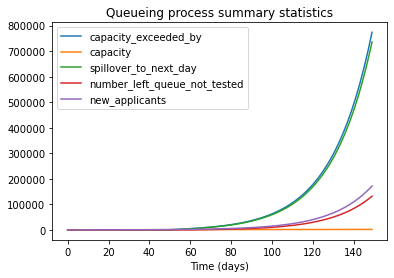

In [14]:
plt.plot('time','capacity_exceeded_by', data = my_queue.queue_info)
plt.plot('time','capacity', data = my_queue.queue_info)
plt.plot('time','spillover_to_next_day', data = my_queue.queue_info)
plt.plot('time','number_left_queue_not_tested', data = my_queue.queue_info)
plt.plot('time','new_applicants', data = my_queue.queue_info)
plt.legend()
plt.title('Queueing process summary statistics')
plt.xlabel('Time (days)')

Text(0, 0.5, '$P$(getting tested)')

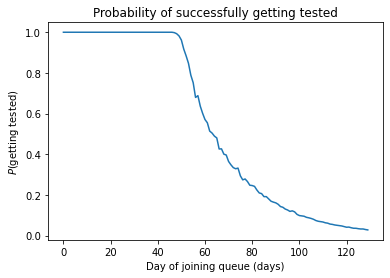

In [16]:
plt.plot([my_queue.get_prob_getting_tested(time) for time in range(130)])
plt.title('Probability of successfully getting tested')
plt.xlabel('Day of joining queue (days)')
plt.ylabel('$P$(getting tested)')

In [10]:
my_queue.applicant_info

,symptom_onset,time_entered_queue,time_will_leave_queue,swabbed,time_swabbed,time_received_result,waiting_to_be_swabbed,left_queue_not_swabbed
0,-2,0,5,True,0,1,False,False
1,-2,0,5,True,0,1,False,False
2,-2,0,5,True,0,1,False,False
3,-2,0,5,True,0,1,False,False
4,-2,0,5,True,0,1,False,False
...,...,...,...,...,...,...,...,...
3524480,147,149,154,False,,,True,
3524481,147,149,154,False,,,True,
3524482,147,149,154,False,,,True,
3524483,147,149,154,False,,,True,


Text(0.5, 1.0, 'Symptom onset to receiving result distribution on day 60')

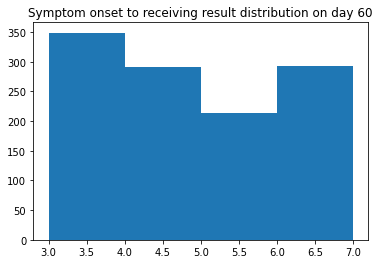

In [11]:
time = 60

delays = my_queue.get_delays_for(time_entered_queue = time,
                                 delay_from_column = 'symptom_onset',
                                 delay_to_column = 'time_received_result')

bin_count = delays.max() - delays.min()

delays.hist(bins = bin_count, grid = False)
plt.title(f'Symptom onset to receiving result distribution on day {time}')